#**데이콘의 '와인 품질 분류 예측 경진대회' 데이터셋을 전처리 및 시각화하고, 분류 알고리즘 적용하기**

- 관련 사이트 : https://dacon.io/competitions/open/235610/overview/description

- 조건 : 분류 모델 3가지 이상 적용


#1. 라이브러리 및 데이터 불러오기

- 프로젝트에 사용할 라이브러리 가져오기


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

- 프로젝트에 사용할 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와인품질분류/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와인품질분류/data/test.csv')
smpl_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와인품질분류/data/sample_submission.csv')

#2. 데이터 전처리

**와인 성분 데이터**

1) train.csv / test.csv의 칼럼 내용
- index 구분자
- quality 품질
- fixed acidity 산도
- volatile acidity 휘발성산
- citric acid 시트르산
- residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
- chlorides 염화물
- free sulfur dioxide 독립 이산화황
- total sulfur dioxide 총 이산화황
- density 밀도
- pH 수소이온농도
- sulphates 황산염
- alcohol 도수
- type 종류

2)  submission.csv (제출 파일 형식)

**각 데이터셋 확인**
- index는 구분자이기 때문에 index는 제외한 나머지 칼럼을 확인

In [4]:
train = train.drop(['index'], axis=1)
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [5]:
test = test.drop(['index'], axis=1)
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


**각 데이터 요약 및 요약 통계량 확인**
- shape() 이용

In [6]:
print(train.shape)
print(test.shape)

(5497, 13)
(1000, 12)


- info () 이용
- describe() 이용

In [7]:
train.info()
train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4159
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,NaN
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,NaN
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,NaN
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,NaN
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,NaN
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,NaN


In [8]:
test.info()
test.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  type                  1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,739
mean,7.243850,0.347930,0.319130,5.47160,0.057275,31.117000,116.723500,0.994825,3.213000,0.535360,10.419693,NaN
std,1.344372,0.172043,0.146561,4.76628,0.037048,18.156527,57.808145,0.002912,0.161165,0.145525,1.180694,NaN
min,4.200000,0.080000,0.000000,0.70000,0.014000,1.000000,7.000000,0.988150,2.720000,0.230000,8.400000,NaN
25%,6.400000,0.230000,0.240000,1.80000,0.039000,17.750000,76.750000,0.992448,3.100000,0.437500,9.500000,NaN
50%,7.000000,0.300000,0.300000,2.90000,0.048000,29.000000,118.500000,0.995130,3.200000,0.510000,10.200000,NaN
75%,7.700000,0.410000,0.392500,8.20000,0.067250,42.000000,156.000000,0.997060,3.312500,0.620000,11.200000,NaN


각 데이터를 살펴보면, 피쳐들의 단위가 다르기 때문에 이에 대한 표준화 작업을 수행해야 한다.

또한 분석해야 하는 type 변수의 경우, 범주형 변수로 되어 있기 때문에 이를 1과 0인 숫자형 변수로 변경해주어야 한다.

**데이터 전처리**

- type변수의 white와 red를 각각 1과 0의 숫자형 변수로 변환

In [9]:
train['type'] = train['type'].replace({'white':0, 'red':1}).astype(int)
test['type'] = test['type'].replace({'white':0, 'red':1}).astype(int)

In [10]:
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0


In [11]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,1
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0


- 단위와 스케일을 맞추기 위한 표준화 작업 수행
  - 이때 type과 quality는 표준화 작업에서 제외하고 수행
  - 표준화 작업이 끝나면 type과 quality 변수를 기존 train변수에 가져오기

In [12]:
from sklearn.preprocessing import StandardScaler
features = train.drop(['quality','type'], axis=1).columns
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.drop(['quality','type'], axis=1))
train_scaled = pd.DataFrame(train_scaled, columns=features)
train_scaled['type'] = train['type']
train_scaled['quality'] = train['quality']
train_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,0,5
1,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,1,5
2,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,0,5
3,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,0,6
4,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,0,6


#3. 탐색적 자료 분석(EDA)
**탐색적 자료 분석(EDA)**
- quality 분포 확인

type
0    4159
1    1338
Name: count, dtype: int64


Text(0.5, 1.0, 'type dist')

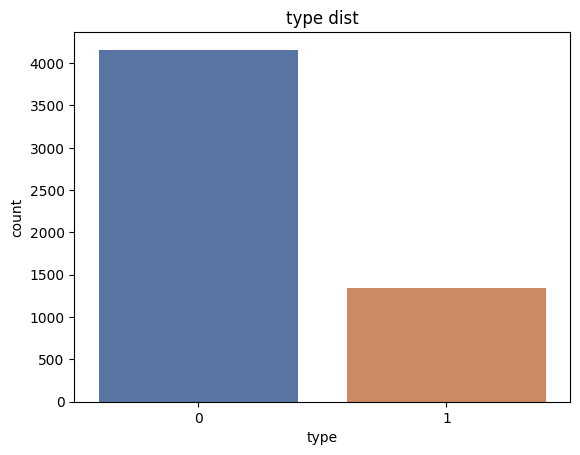

In [13]:
print(train_scaled['type'].value_counts())
sns.countplot(x=train_scaled['type'], palette='deep')
plt.title('type dist', fontsize=12)

해당 그래프를 보아 레드와인에 비해 화이트와인이 많은 것을 확인할 수 있다.


 - 변수 간 상관관계 시각화 (heatmap)

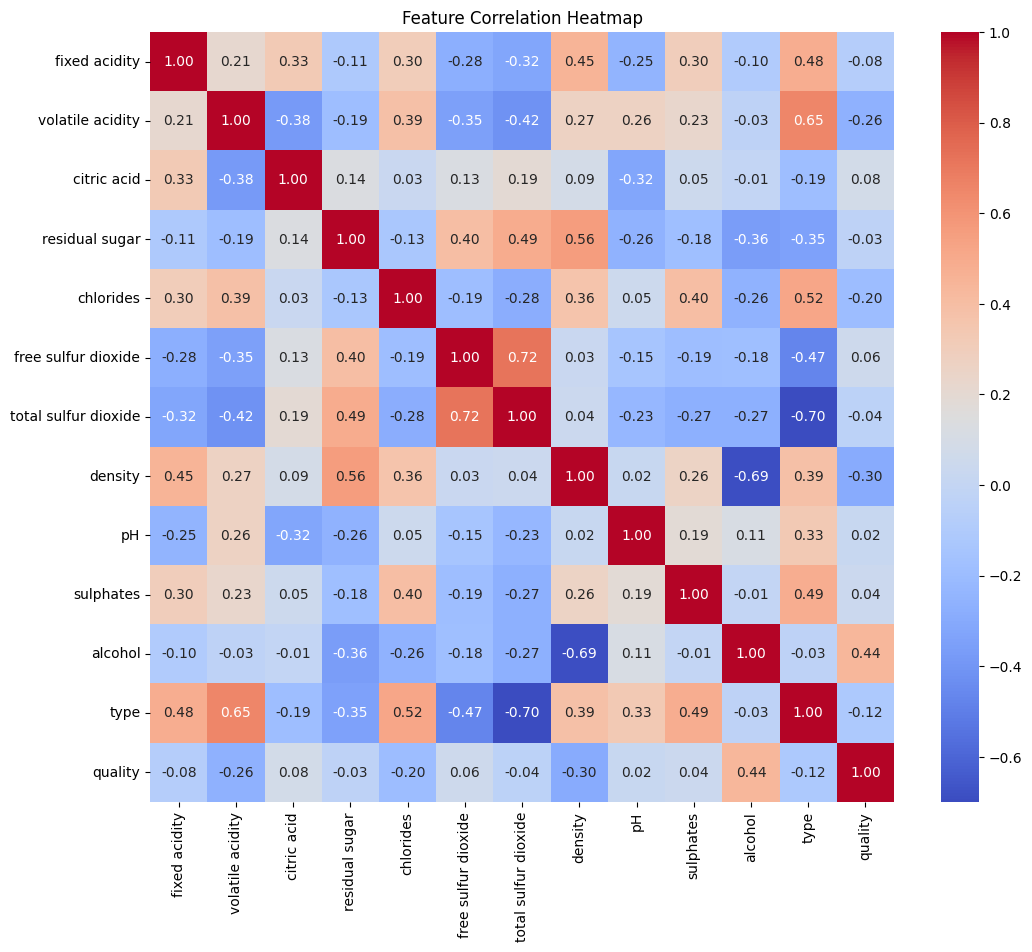

In [14]:
plt.figure(figsize=(12, 10))
corr = train_scaled.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

heatmap을 확인한 결과 alcohol과 quality의 양의 상관관계를 확인할 수 있었음

즉, alcohol이 높은 와인은 품질도 높은 경향을 가지고 있음을 확인할 수 있음

sulphates도 alcohol만큼은 아니지만 품질과 약간의 양의 상관관계를 확인할 수 있음

나머지 변수의 경우 quality와 거의 상관이 없거나 음의 상관관계를 보여줌 (대표적: volatile acidity)

- alcohol vs quality

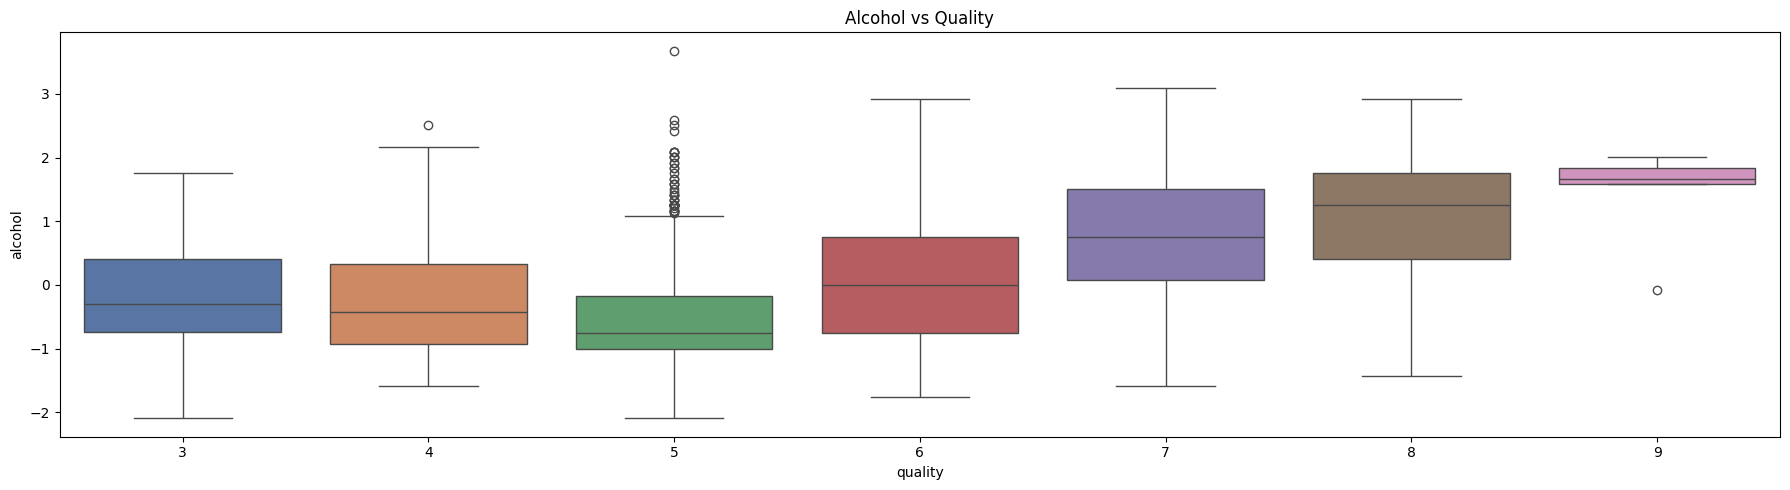

In [15]:
plt.figure(figsize=(18, 5))
sns.boxplot(x='quality', y='alcohol', data=train_scaled, palette='deep')
plt.title(f'Alcohol vs Quality')
plt.tight_layout()
plt.show()

5등급부터 quality가 높아질 수록 alcohol이 높아지는 양의 상관관계를 확인할 수 있다.

- sulphates vs quality

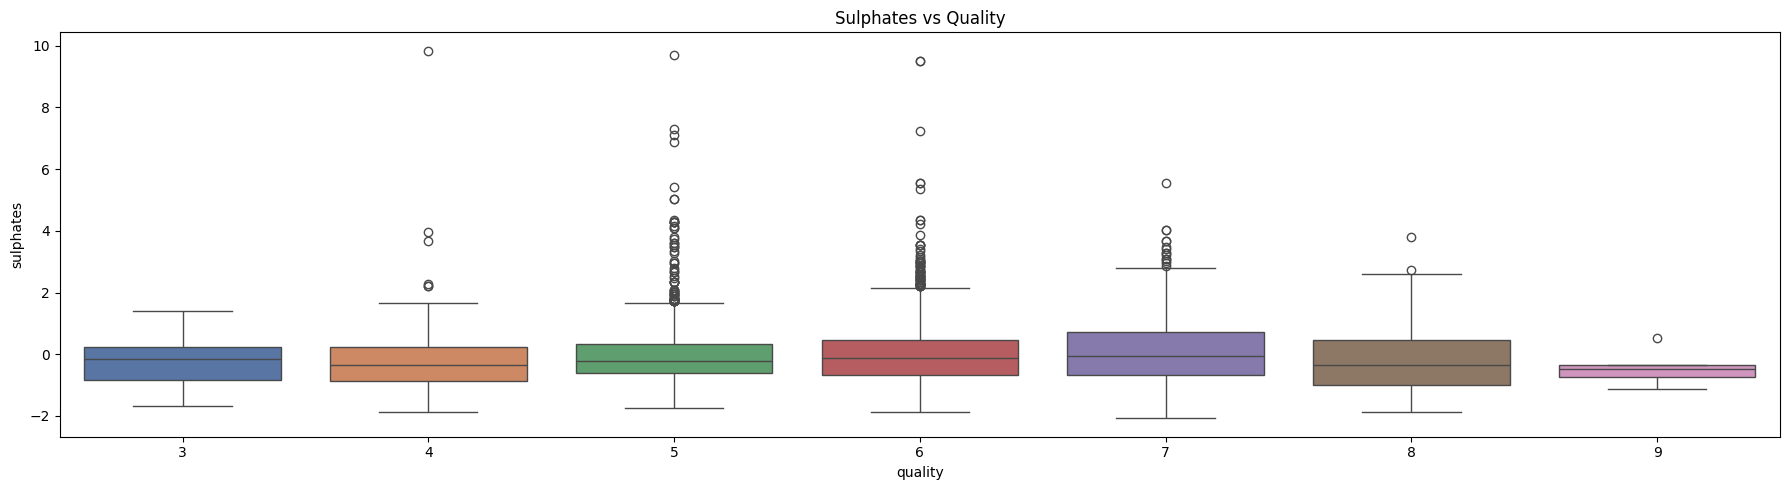

In [16]:
plt.figure(figsize=(18, 5))
sns.boxplot(x='quality', y='sulphates', data=train_scaled, palette='deep')
plt.title(f'Sulphates vs Quality')
plt.tight_layout()
plt.show()

0.04라는 상관관계에서 볼 수 있듯 거의 연관이 없어보이는 분포를 확인할 수 있다.

- volatile acidity vs quality

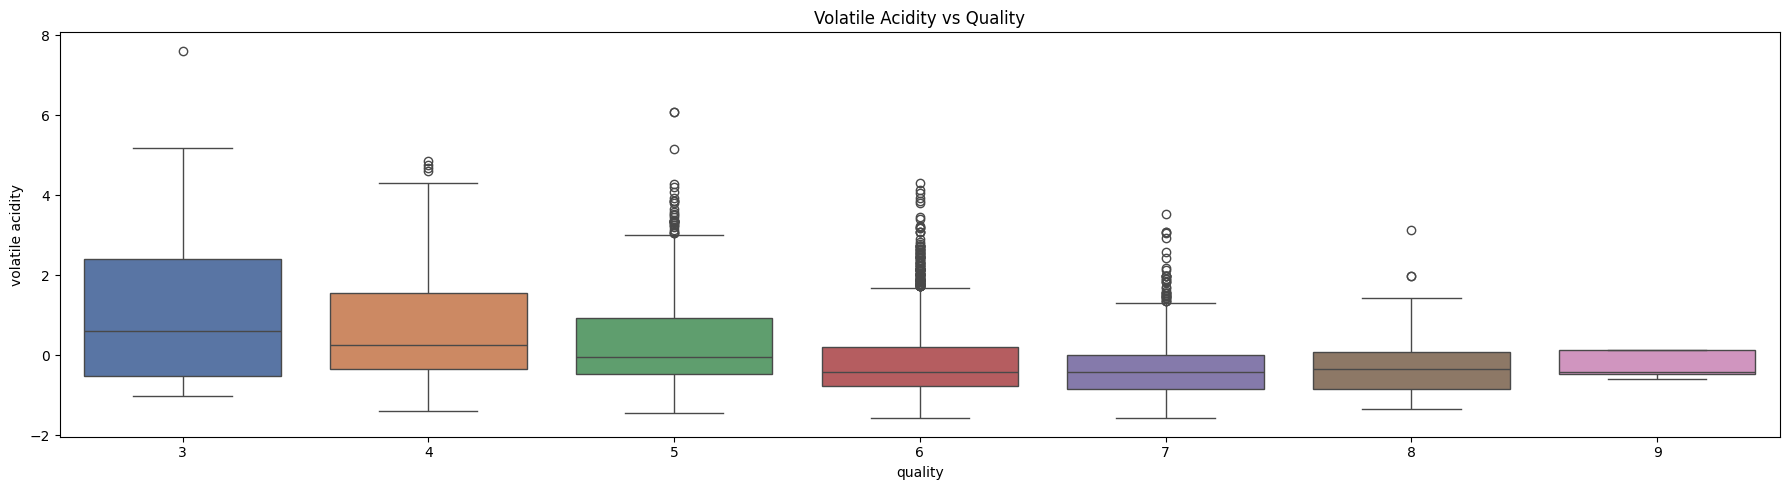

In [17]:
plt.figure(figsize=(18, 5))
sns.boxplot(x='quality', y='volatile acidity', data=train_scaled, palette='deep')
plt.title(f'Volatile Acidity vs Quality')
plt.tight_layout()
plt.show()

전체적으로 quailty가 높아질수록 volatile acidity가 감소하는 음의 상관관계를 확인할 수 있다.

- train의 각 변수별 분포 확인

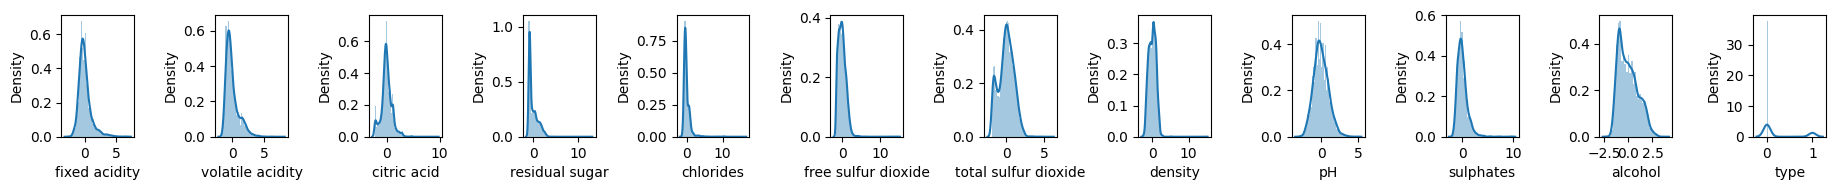

In [18]:
plt.figure(figsize=(20,2))
for i in range(1,13):
  plt.subplot(1,13,i)
  sns.distplot(train_scaled.iloc[:,i-1])
plt.tight_layout()
plt.show()

#4. 품질을 예측하는 분류 알고리즘 적용

###**1) RandomForest, XGBoost, LightGBM 모델을 이용한 와인 품질 예측**

**데이터 분할**
- train_scaled 데이터 중 80%는 train, 20%는 test로 분할하여 훈련용 데이터와 검증용 데이터를 나누기


In [19]:
from sklearn.model_selection import train_test_split

X= train_scaled.drop('quality', axis=1)
y= train_scaled['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

**예측 성능을 확인하기 위한 함수 생성**

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score

def clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred, average='macro')
  recall = recall_score(y_test, pred, average='macro')
  f1 = f1_score(y_test, pred, average='macro')

  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

####**랜덤 포레스트(RandomForestClassifier) 적용**

**랜덤포레스트(RandomForest)적용**

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=156)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
clf_eval(y_test, pred)

오차 행렬
[[  0   0   2   3   0   0   0]
 [  0   4  23  14   0   0   0]
 [  0   1 268  94   3   0   0]
 [  0   0  74 380  30   0   0]
 [  0   0   5  82  91   0   0]
 [  0   0   1  12   5   7   0]
 [  0   0   0   0   1   0   0]]
정확도: 0.6818, 정밀도: 0.5526, 재현율: 0.3437, F1:0.3769


**GridSearchCV를 통한 하이퍼파라미터 튜닝**

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200], # 파라미터를 늘리면 성능이 좋아질 수도 있음
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=156),
    param_grid=params,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)
grid_rf.fit(X_train, y_train)

print("Best Params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


**하이퍼 파라미터를 이용한 랜덤포레스트 모델 재학습 및 평가**

In [31]:
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
clf_eval(y_test, y_pred)

오차 행렬
[[  0   0   2   3   0   0   0]
 [  0   5  24  12   0   0   0]
 [  0   0 265  98   3   0   0]
 [  0   0  69 385  30   0   0]
 [  0   0   5  78  95   0   0]
 [  0   0   0  13   6   6   0]
 [  0   0   0   0   1   0   0]]
정확도: 0.6873, 정밀도: 0.5833, 재현율: 0.3450, F1:0.3792


**변수 중요도 시각화**

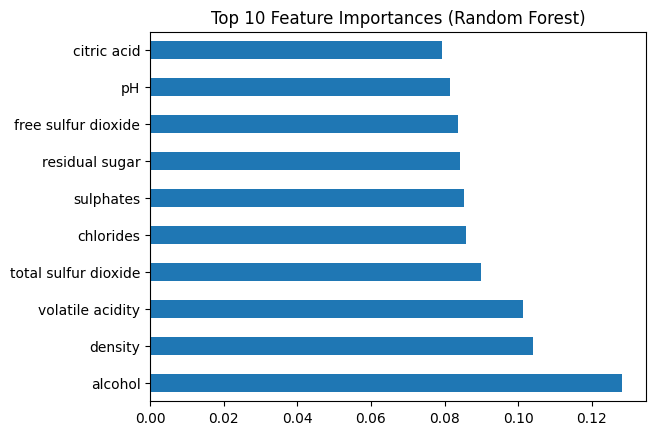

In [32]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

####**XGBoost 적용**

**GridSearchCV를 통한 하이퍼파라미터 튜닝**

In [33]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1]
}
grid_xgb = GridSearchCV(XGBClassifier(random_state=156, eval_metric='mlogloss'), xgb_params, cv=3, scoring='accuracy', n_jobs=-1)

grid_xgb.fit(X_train, y_train_le)

print("Best Params:", grid_xgb.best_params_)
best_xgb = grid_xgb.best_estimator_

Best Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


In [35]:
best_xgb.fit(X_train, y_train_le)
xgb_pred_enc = best_xgb.predict(X_test)
xgb_pred = le.inverse_transform(xgb_pred_enc) # inverse_transform()을 이용하여 원래 품질 점수로 복원
clf_eval(y_test, xgb_pred)

오차 행렬
[[  0   0   3   2   0   0   0]
 [  0   6  25   9   1   0   0]
 [  0   3 260  98   5   0   0]
 [  0   0  76 366  41   1   0]
 [  0   0   4  77  96   1   0]
 [  0   0   0  12   7   6   0]
 [  0   0   0   0   1   0   0]]
정확도: 0.6673, 정밀도: 0.4868, 재현율: 0.3417, F1:0.3706


**변수 중요도 시각화**

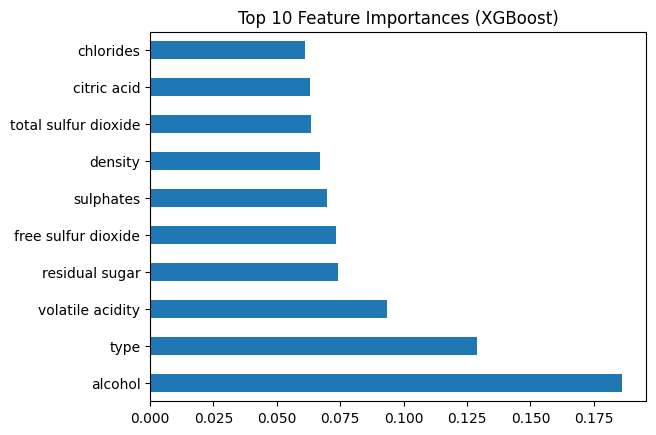

In [36]:
feature_importances = pd.Series(best_xgb.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()

#### **LightGBM 적용**

**GridSearchCV를 통한 하이퍼파라미터 튜닝**

In [37]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

lgbm_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50]
}

grid_lgbm = GridSearchCV(
    lgbm.LGBMClassifier(random_state=156),
    lgbm_params,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_lgbm.fit(X_train, y_train_le)
print("Best Params:", grid_lgbm.best_params_)
best_lgbm = grid_lgbm.best_estimator_

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1509
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 12
[LightGBM] [Info] Start training from score -5.344155
[LightGBM] [Info] Start training from score -3.411944
[LightGBM] [Info] Start training from score -1.128858
[LightGBM] [Info] Start training from score -0.822367
[LightGBM] [Info] Start training from score -1.773952
[LightGBM] [Info] Start training from score -3.544491
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [38]:
best_lgbm.fit(X_train, y_train_le)
lgbm_pred_le = best_lgbm.predict(X_test)
lgbm_pred = le.inverse_transform(lgbm_pred_le)

clf_eval(y_test, lgbm_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1509
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 12
[LightGBM] [Info] Start training from score -5.344155
[LightGBM] [Info] Start training from score -3.411944
[LightGBM] [Info] Start training from score -1.128858
[LightGBM] [Info] Start training from score -0.822367
[LightGBM] [Info] Start training from score -1.773952
[LightGBM] [Info] Start training from score -3.544491
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

**변수 중요도 시각화**

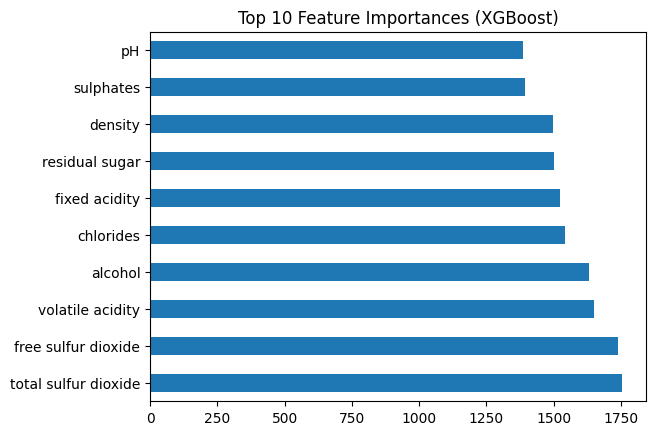

In [39]:
feature_importances = pd.Series(best_lgbm.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()

RandomForest, XGBoost, LightGBM을 사용한 결과 RandomForest가 가장 성능이 좋은 것을 확인할 수 있으나 이도 현저히 낮은 성능을 가진것을 확인할 수 있다.

###**2) StackingClassifier을 이용한 와인 품질 예측**

**필요한 라이브러리 임포트**

In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

**개별 모델 정의 및 메타 모델 정의**

In [41]:
# 기본 모델 정의
rf_clf = RandomForestClassifier(n_estimators=100, random_state=156)
xgb_clf = XGBClassifier(n_estimators=100, random_state=156, use_label_encoder=False, eval_metric='mlogloss')
lgbm_clf = LGBMClassifier(n_estimators=100, random_state=156)

# 최종 예측에 사용할 메타 모델 정
meta_clf = LogisticRegression()

**StackingClassifier 정의**

In [42]:
stacking_clf = StackingClassifier(
    estimators=[('rf', rf_clf), ('xgb', xgb_clf), ('lgbm', lgbm_clf)],
    final_estimator=meta_clf,
    passthrough=True,  # 개별 모델의 입력 특성도 메타 모델에 전달하고자 True 설
    cv=5
)

**학습 및 예측**

In [44]:
stacking_clf.fit(X_train, y_train)
pred = stacking_clf.predict(X_test)
pred_proba = stacking_clf.predict_proba(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1509
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 12
[LightGBM] [Info] Start training from score -5.344155
[LightGBM] [Info] Start training from score -3.411944
[LightGBM] [Info] Start training from score -1.128858
[LightGBM] [Info] Start training from score -0.822367
[LightGBM] [Info] Start training from score -1.773952
[LightGBM] [Info] Start training from score -3.544491
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

**성능 평가**

In [45]:
clf_eval(y_test, pred, pred_proba)

오차 행렬
[[  0   0   3   2   0   0   0]
 [  0   5  25  11   0   0   0]
 [  0   1 261  98   6   0   0]
 [  0   1  71 379  31   2   0]
 [  0   0   4  79  94   1   0]
 [  0   0   0  11   8   6   0]
 [  0   0   0   0   1   0   0]]
정확도: 0.6773, 정밀도: 0.4890, 재현율: 0.3409, F1:0.3686


###**3) VotingClassifier을 이용한 와인 품질 예측**

**필요한 라이브러리 임포트**

In [46]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

**개별 모델 정의**

In [47]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=156)
xgb_clf = XGBClassifier(n_estimators=100, random_state=156, use_label_encoder=False, eval_metric='mlogloss')
lgbm_clf = LGBMClassifier(n_estimators=100, random_state=156)

**VotingClassifier정의 (SoftVoting)**

In [48]:
voting_clf = VotingClassifier(
    estimators=[('RF', rf_clf), ('XGB', xgb_clf), ('LGBM', lgbm_clf)],
    voting='soft'  # soft voting은 predict_proba 평균 사
)

**학습 및 예측**

In [49]:
voting_clf.fit(X_train, y_train)
pred = voting_clf.predict(X_test)
pred_proba = voting_clf.predict_proba(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1509
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 12
[LightGBM] [Info] Start training from score -5.344155
[LightGBM] [Info] Start training from score -3.411944
[LightGBM] [Info] Start training from score -1.128858
[LightGBM] [Info] Start training from score -0.822367
[LightGBM] [Info] Start training from score -1.773952
[LightGBM] [Info] Start training from score -3.544491
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

**성능 평가**

In [50]:
clf_eval(y_test, pred, pred_proba)

오차 행렬
[[  0   0   3   2   0   0   0]
 [  0   6  25  10   0   0   0]
 [  0   2 259 102   3   0   0]
 [  0   0  73 378  33   0   0]
 [  0   0   4  75  98   1   0]
 [  0   0   0  12   7   6   0]
 [  0   0   0   0   1   0   0]]
정확도: 0.6791, 정밀도: 0.5231, 재현율: 0.3465, F1:0.3790


###**4) quality 변수를 단순화하여 stacking 모델 적용**

- 예측 성능을 높이기 위하여 와인의 품질 변수인 quality변수를 low, mid, high의 3등급으로 나눔
- 기본 모델 3가지(RandomForest, XGBoost, LightGBM)를 정의하고 StackingClassifier을 적용하여 예측 및 성능 평가

**quality변수를 3분류로 나누는 함수 정의**

In [51]:
def simplify_quality(q):
    if q <= 5:
        return 'low'
    elif q <= 7:
        return 'mid'
    else:
        return 'high'

**데이터 분할**

In [52]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


train_scaled['quality_bin'] = train_scaled['quality'].apply(simplify_quality)
le = LabelEncoder()
train_scaled['quality_bin_le'] = le.fit_transform(train_scaled['quality_bin'])

X = train_scaled.drop(['quality', 'quality_bin', 'quality_bin_le'], axis=1)
y = train_scaled['quality_bin_le']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=156)

**기본 모델 정의 및 StackingClassifier 적용**

In [53]:
rf = RandomForestClassifier(n_estimators=100, random_state=156)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=156, eval_metric='mlogloss')
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=156)


estimators = [
    ('rf', rf),
    ('xgb', xgb),
    ('lgbm', lgbm)
]

stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

stack_clf.fit(X_train, y_train)
y_pred = stack_clf.predict(X_test)

clf_eval(y_test, y_pred)

오차 행렬
[[  9   0  23]
 [  0 292 108]
 [  0  78 590]]
정확도: 0.8100, 정밀도: 0.8692, 재현율: 0.6315, F1:0.6823


품질을 단순화하여 진행한 결과, 위의 모델보다 훨씬 높아진 예측성능을 확인할 수 있다.